# Final Project Part 1: Kaggle Loan Data

**key:** <br>
1. Blue dotted line = Notes
2. Green dotted line = Main part of the document
3. Red dotted line = parts with major errors or irrelevant information like the appendix

<font color='blue'>------------------------------------------------------------------------------------------------------------------</font>

## Notes

**There are three documents in this final project series:** <br>
1. Final Project Part 1&2_G_H (this document) <br>
2. Final Project Part 3_G_H <br>
3. Slides_Final_Project_Data_Graham_Herdman (My presentation) <br>

<font color = 'blue'> This is part 1 and 2 of my final project that I completed and presented during my 10-week data science course at General Assembly (May 2018 - July 2018) </font> 

<font color = 'blue'> In hindsight there are many errors that I made when making this final project for the first time <br>
<br>
**Notable errors:** <br>
<br>
**PART 2:** <br>
- **Not enough EDA:** This was my first time working with such a large data set so I had some trouble performing exploratory data analysis. I tried a wide array of techniques both before and after I accounted for missing values which unfortunately left the EDA section without much structure. In future projects I plan to make this section have a much more logical flow to it so that useful information can be accessed more quickly. <br> 
    
**PART 3:** <br>
- **Not accounting for confounding:** e.g. total_pymnt vs total_pymnt_inv. These two features were highly correlated with each other and therefore I should've choosen the most relevant feature (total_pymnt) and cut the other (total_pymnt_inv) in order to account for confounding variables in the data set. <br>  
- **Not using hyper parameter tuning with Random Forest:** Although I found logistic regression to be the most useful classification model for predicting whether a loan would default or not, I believe the Random Forest model was not given a fair chance since I did not optimize it's hyper parameters. </font>

<font color='blue'>------------------------------------------------------------------------------------------------------------------</font>

<font color='green'>------------------------------------------------------------------------------------------------------------------</font>

## 1) Create Hypothesis

### Hypothesis / Assumptions

**Hypothesis:** What are the top 5 factors that best predict whether an entity will default on their loans and is it possible to build a classifier that will predict whether an entity will default on their loans within an accuracy level of 80%. 

**Assumptions:**: <br>
1) The dataset given is indicative of the entire set of Australian/American loans <br>
2) There are at least 5 factors in the dataset that are highly correlated with loan repayments/defaults <br>
3) The model will be heavily weighted towards the grade given to loans by rating agencies <br>

#### Goals / Success Metrics

**Goals:** <br>
1) To ascertain what the best predictors of loan defaults are from the Kaggle dataset. <br>
2) To build a classifier that will take advantage of the knowledge gained in our hypothesis and be able to ascertain the likelihood of a particular entity defaulting on a loan. <br> 
<br> 
**Success Metrics:** <br>
1) List the top 5 best loan default predictors based on the 72 features in the Kaggle dataset <br>
2) Build a classifier that has at least 80% accuracy on test loan data <br>

### Risks / Limitations

**Risks / Limitations:** <br>
1) The dataset may not have enough predictive features to build a classifier that has at least 80% accuracy. <br>
2) It is not clear whether it is possible to build a classifier that predicts if an entity will default on their loans within 80% accuracy

# Final Project Part 2: Brief - Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## 2) Locate and Access Data

In [2]:
# Read in the loans data and store it in a pandas DataFrame
loans = pd.read_csv('./lending-club-loan-data/loan.csv', low_memory=False)

## 3) Subset to Appropriate Time Period

Not required 

## 4) Explore Data - Graphs and Correlations

- Sorry about the mess... I kinda ran out of time to fix this section up

In [3]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loans.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


In [5]:
# the row index (aka "the row labels" -- in this case integers)
loans.index

RangeIndex(start=0, stop=887379, step=1)

In [6]:
# column names (which is "an index")
loans.columns  

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [7]:
# number of features in the data set
len(loans.columns)

74

In [8]:
# data types of each column -- each column is stored as an ndarray which has a data type
loans.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [9]:
# number of rows and columns
loans.shape

(887379, 74)

WOW... This is a big dataset

In [10]:
# all values as a numpy array
loans.values

array([[1077501, 1296599, 5000.0, ..., nan, nan, nan],
       [1077430, 1314167, 2500.0, ..., nan, nan, nan],
       [1077175, 1313524, 2400.0, ..., nan, nan, nan],
       ...,
       [36271333, 38982739, 13000.0, ..., nan, nan, nan],
       [36490806, 39222577, 12000.0, ..., nan, nan, nan],
       [36271262, 38982659, 20000.0, ..., nan, nan, nan]], dtype=object)

**Data Description**

In [11]:
# concise summary (including memory usage) -- useful to quickly see if nulls exist
loans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [12]:
# describe all numeric columns
loans.describe() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [13]:
# describe all object columns (can include multiple types)
loans.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,887379,887379,887379,835917,842554,887379,887379,887379,887379,887379,...,887227,887379,887379,887350,887379,869720,634408,887326,887379,511
unique,2,7,35,299271,11,6,3,103,10,2,...,63144,935,51,697,2,98,100,103,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,Current,n,...,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,48631,601779,887369,...,414001,9770,129517,6659,456848,470150,553406,730574,886868,283


In [14]:
# describe all columns, including non-numeric
loans.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379,887379.000000,887379.000000,887379,887379,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,621125,NaN,NaN,254535,56323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,NaN,13.246740,436.717127,NaN,NaN,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,NaN,4.381867,244.186593,NaN,NaN,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.320000,15.670000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,NaN,9.990000,260.705000,NaN,NaN,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,NaN,12.990000,382.550000,NaN,NaN,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,NaN,16.200000,572.600000,NaN,NaN,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000


**-Heat Map**

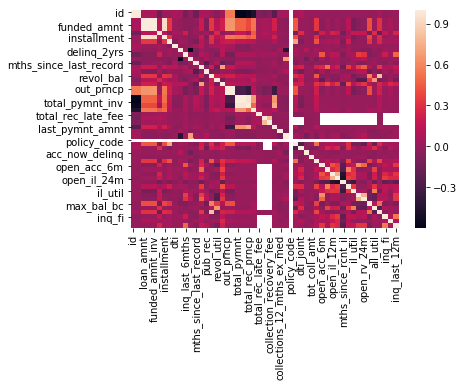

In [40]:
sns.heatmap(loans.corr())

**-Box Plots**

In [15]:
# Describe a single column -- recall that 'users.gender' refers to a Series
loans.loan_amnt.describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [16]:
# mean amount loaned 
loans.loan_amnt.mean()

14755.26460508982

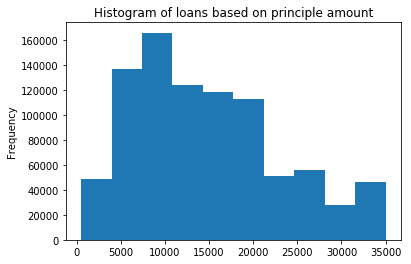

In [47]:
# draw a histogram of a column (loan principle)
loans.loan_amnt.plot(kind='hist', title='Histogram of loans based on principle amount', );

**Count the number of occurrences of each value**

In [18]:
loans.loan_status.value_counts()     # most useful for categorical variables

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

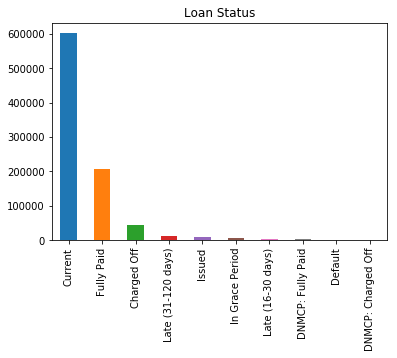

In [62]:
loan_status_rename = {'Does not meet the credit policy. Status:Fully Paid': 'DNMCP: Fully Paid',
                     'Does not meet the credit policy. Status:Charged Off': 'DNMCP: Charged Off'}

loans.loan_status.replace(loan_status_rename, inplace=True)

loans.loan_status.value_counts().plot(kind='bar', 
                                      title='Loan Status');    # quick plot by category

In [20]:
# can also be used with numeric variables
# try .sort_index() to sort by indices or .sort_values() to sort by counts
loans.installment.value_counts()

327.34     2610
318.79     2142
491.01     1785
392.81     1775
312.86     1619
382.55     1553
654.68     1529
478.19     1448
314.20     1432
322.63     1426
261.88     1394
163.67     1388
336.90     1354
196.41     1354
332.10     1348
375.43     1288
329.91     1238
469.29     1205
333.53     1195
159.40     1175
637.58     1169
387.15     1153
335.45     1136
483.94     1094
255.04     1090
625.72     1078
880.61     1071
377.04     1070
191.28     1066
289.34      999
           ... 
651.52        1
81.57         1
612.82        1
1228.51       1
362.87        1
748.68        1
946.58        1
653.70        1
578.76        1
556.44        1
828.66        1
831.34        1
76.86         1
76.64         1
690.45        1
929.52        1
82.08         1
828.91        1
831.09        1
693.80        1
968.21        1
183.40        1
698.56        1
910.17        1
207.04        1
306.81        1
690.95        1
174.07        1
61.44         1
32.00         1
Name: installment, Lengt

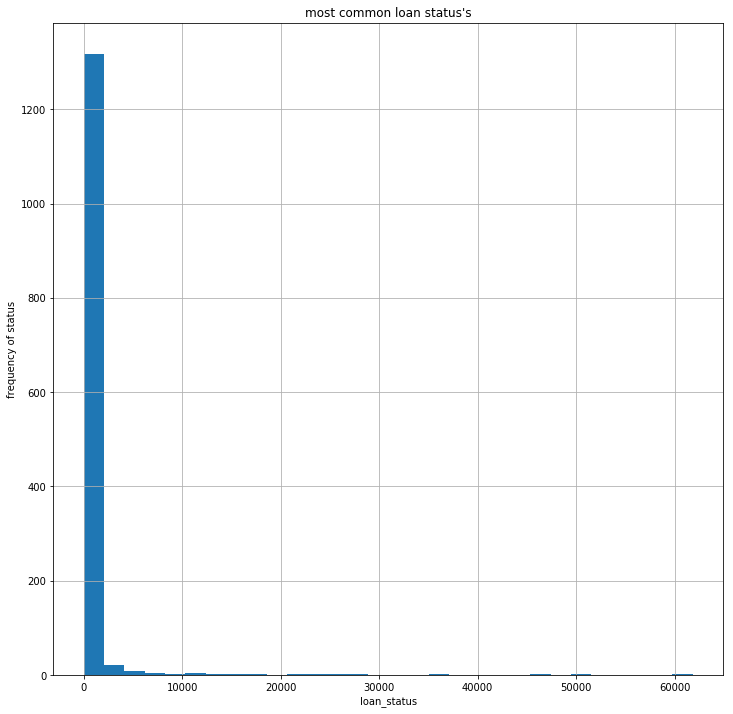

In [21]:
loans.loan_amnt.value_counts().sort_index().hist( bins = 30, figsize=(12,12));     # bigger plot by increasing installment
plt.xlabel('loan_status');
plt.ylabel('frequency of status');
plt.title('most common loan status\'s');

**Filtering and Sorting**

In [22]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# create a Series of booleans...
# in Pandas, this comparison is performed element-wise on each row of data
# 
amount_5000 = loans.loan_amnt < 5000
amount_5000

0         False
1          True
2          True
3         False
4          True
5         False
6         False
7          True
8         False
9         False
10        False
11        False
12        False
13         True
14        False
15         True
16        False
17         True
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28         True
29        False
          ...  
887349    False
887350    False
887351     True
887352    False
887353    False
887354    False
887355    False
887356    False
887357    False
887358    False
887359    False
887360    False
887361    False
887362    False
887363    False
887364    False
887365    False
887366    False
887367    False
887368    False
887369     True
887370    False
887371    False
887372    False
887373    False
887374    False
887375    False
887376    False
887377    False
887378    False
Name: loan_amnt, Length:

In [24]:
# ...and use that Series to filter rows
# in Pandas, indexing a DataFrame by a Series of booleans only selects rows that are True in the boolean
loans[amount_5000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1069866,1304956,3000.0,3000.0,3000.0,36 months,9.91,96.68,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1069759,1304871,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1069971,1304884,3600.0,3600.0,3600.0,36 months,6.03,109.57,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1069799,1304678,4000.0,4000.0,4000.0,36 months,11.71,132.31,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1032111,1261745,4375.0,4375.0,4375.0,36 months,7.51,136.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,1069314,1304202,3000.0,3000.0,3000.0,36 months,18.25,108.84,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# or, combine into a single step
loans[loans.loan_amnt < 5000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1069866,1304956,3000.0,3000.0,3000.0,36 months,9.91,96.68,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1069759,1304871,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1069971,1304884,3600.0,3600.0,3600.0,36 months,6.03,109.57,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1069799,1304678,4000.0,4000.0,4000.0,36 months,11.71,132.31,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1032111,1261745,4375.0,4375.0,4375.0,36 months,7.51,136.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,1069314,1304202,3000.0,3000.0,3000.0,36 months,18.25,108.84,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# select one column from the filtered results
loans[loans.loan_amnt < 5000].loan_status

1                Charged Off
2                 Fully Paid
4                    Current
7                 Fully Paid
13                Fully Paid
15                Fully Paid
17                Fully Paid
28                Fully Paid
30                Fully Paid
42                Fully Paid
43                Fully Paid
65                Fully Paid
72                Fully Paid
83                Fully Paid
87                Fully Paid
98                Fully Paid
109               Fully Paid
126               Fully Paid
141               Fully Paid
168              Charged Off
172               Fully Paid
174               Fully Paid
200               Fully Paid
210               Fully Paid
227               Fully Paid
228               Fully Paid
230               Fully Paid
233               Fully Paid
234               Fully Paid
250               Fully Paid
                 ...        
886930               Current
886932               Current
886950               Current
886955        

In [27]:
# value_counts of resulting Series
loans[loans.loan_amnt < 5000].loan_status.value_counts()

Current                                                44939
Fully Paid                                             23376
Charged Off                                             4287
Late (31-120 days)                                       742
Issued                                                   740
Does not meet the credit policy. Status:Fully Paid       586
In Grace Period                                          399
Late (16-30 days)                                        183
Does not meet the credit policy. Status:Charged Off      174
Default                                                   87
Name: loan_status, dtype: int64

In [28]:
# logical filtering with multiple conditions
# ampersand for AND condition. (this is a "bitwise" AND)
# important: you MUST put parentheses around each expression because '&' has a higher precedence than '<'!
loans[(loans.loan_amnt < 5000) & (loans.loan_status=='Default')]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
23773,609371,781630,4200.0,4200.0,4200.0,60 months,9.99,89.22,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46402,10034724,11876866,3600.0,3600.0,3600.0,36 months,14.98,124.76,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,3900.0,NaN,NaN,NaN
56736,9037752,10849679,4200.0,4200.0,4200.0,36 months,17.76,151.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,15700.0,NaN,NaN,NaN
57955,9065335,10877428,1000.0,1000.0,1000.0,36 months,11.99,33.21,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,7400.0,NaN,NaN,NaN
65197,8629831,10401619,4000.0,4000.0,4000.0,36 months,16.20,141.03,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,11700.0,NaN,NaN,NaN
65352,7676141,9378223,4000.0,4000.0,4000.0,36 months,17.76,144.13,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,17400.0,NaN,NaN,NaN
86929,7379459,9041421,1200.0,1200.0,1200.0,36 months,19.52,44.31,D,D4,...,NaN,NaN,NaN,NaN,NaN,NaN,42800.0,NaN,NaN,NaN
90323,7076622,8738790,4500.0,4500.0,4500.0,36 months,9.99,145.19,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,30300.0,NaN,NaN,NaN
102266,6727446,8329727,4500.0,4500.0,4500.0,36 months,7.90,140.81,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,66700.0,NaN,NaN,NaN
104234,6637240,8219357,4500.0,4500.0,4500.0,36 months,13.05,151.74,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,14300.0,NaN,NaN,NaN


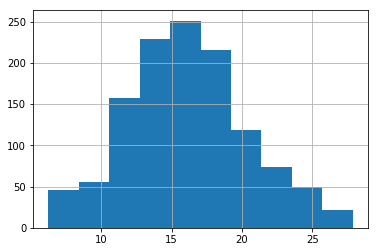

In [29]:
loans[loans.loan_status=='Default'].int_rate.hist();

In [30]:
# pipe for OR condition. (this is a "bitwise" OR)
# important: you MUST put parentheses around each expression because '|' has a higher precedence than '<'!
loans[(loans.loan_amnt < 5000) | (loans.loan_amnt > 10000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1069908,1305008,12000.0,12000.0,12000.000000,36 months,12.69,402.54,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1069866,1304956,3000.0,3000.0,3000.000000,36 months,9.91,96.68,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1069759,1304871,1000.0,1000.0,1000.000000,36 months,16.29,35.31,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1069971,1304884,3600.0,3600.0,3600.000000,36 months,6.03,109.57,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,1069740,1284848,20250.0,20250.0,19142.161077,60 months,15.27,484.63,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1039153,1269083,21000.0,21000.0,21000.000000,36 months,12.42,701.73,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# preferred alternative to multiple OR conditions
loans[loans.loan_status.isin(['Default', 'In Grace Period'])].grade.value_counts()

C    2247
D    1717
B    1438
E    1109
F     433
A     412
G     116
Name: grade, dtype: int64

**Sorting**

In [32]:
# sort a Series
loans.loan_amnt.sort_values() 

39466       500.0
38932       500.0
42136       500.0
41824       500.0
39344       500.0
41704       500.0
42320       500.0
42417       500.0
39613       500.0
42362       500.0
39442       500.0
42066       550.0
42216       600.0
42283       600.0
41718       600.0
41822       600.0
42197       600.0
41954       600.0
42159       700.0
38968       700.0
42346       700.0
38936       725.0
39280       750.0
42186       800.0
39331       800.0
42212       800.0
42313       850.0
42281       900.0
39617       900.0
39212       900.0
           ...   
494163    35000.0
848256    35000.0
717320    35000.0
130315    35000.0
493950    35000.0
493947    35000.0
130472    35000.0
230026    35000.0
717482    35000.0
717474    35000.0
130605    35000.0
493786    35000.0
717462    35000.0
345440    35000.0
305421    35000.0
717456    35000.0
345428    35000.0
717319    35000.0
305376    35000.0
230025    35000.0
493867    35000.0
848194    35000.0
717428    35000.0
493883    35000.0
848199    

In [33]:
loans.sort_values('loan_amnt', ascending=False)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
758099,47654450,50873179,35000.0,35000.0,35000.000000,60 months,21.67,960.11,E,E5,...,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,NaN,NaN
814939,43335180,46321895,35000.0,35000.0,35000.000000,60 months,13.33,802.29,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,8200.0,NaN,NaN,NaN
358962,20038102,22300747,35000.0,35000.0,35000.000000,60 months,16.99,869.66,D,D3,...,NaN,NaN,NaN,NaN,NaN,NaN,49000.0,NaN,NaN,NaN
358967,19275967,21468736,35000.0,35000.0,35000.000000,36 months,11.67,1157.00,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,52500.0,NaN,NaN,NaN
434254,12507479,14519598,35000.0,35000.0,35000.000000,60 months,15.31,838.36,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,55000.0,NaN,NaN,NaN
706085,53040760,56540501,35000.0,35000.0,35000.000000,36 months,7.89,1095.00,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,76100.0,NaN,NaN,NaN
706086,53101887,56601631,35000.0,35000.0,34975.000000,60 months,19.19,911.59,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,30400.0,NaN,NaN,NaN
462039,10125956,11978057,35000.0,35000.0,35000.000000,60 months,16.24,855.61,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,49200.0,NaN,NaN,NaN
706107,53040791,56540534,35000.0,35000.0,35000.000000,60 months,14.65,826.24,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,52700.0,NaN,NaN,NaN
168345,3239925,3982735,35000.0,35000.0,34950.000000,60 months,17.27,874.93,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,91900.0,NaN,NaN,NaN


In [34]:
# sort by multiple columns
loans.sort_values(['grade', 'loan_status'], ascending=False)  

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
17831,710167,902889,14600.0,14600.0,14550.0,60 months,21.59,399.85,G,G5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43978,10034738,11876880,19600.0,19600.0,19600.0,60 months,25.89,585.56,G,G3,...,NaN,NaN,NaN,NaN,NaN,NaN,25800.0,NaN,NaN,NaN
50702,9665694,11517752,26375.0,26375.0,26375.0,60 months,25.83,787.03,G,G2,...,NaN,NaN,NaN,NaN,NaN,NaN,47100.0,NaN,NaN,NaN
52757,9384801,11216940,25000.0,25000.0,24975.0,60 months,25.83,746.00,G,G2,...,NaN,NaN,NaN,NaN,NaN,NaN,21100.0,NaN,NaN,NaN
57424,9026488,10838489,10750.0,10750.0,10750.0,60 months,25.83,320.78,G,G2,...,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN
60455,8975588,10777679,30000.0,30000.0,29975.0,60 months,25.80,894.67,G,G1,...,NaN,NaN,NaN,NaN,NaN,NaN,34100.0,NaN,NaN,NaN
62991,8876670,3411437,30000.0,30000.0,29975.0,60 months,25.99,898.04,G,G4,...,NaN,NaN,NaN,NaN,NaN,NaN,20500.0,NaN,NaN,NaN
69402,8224904,9967044,27575.0,27575.0,27575.0,60 months,25.89,823.82,G,G3,...,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,NaN,NaN,NaN
70344,8555724,10307821,27300.0,27300.0,27300.0,60 months,25.89,815.60,G,G3,...,NaN,NaN,NaN,NaN,NaN,NaN,97500.0,NaN,NaN,NaN
79027,7688691,9390211,25000.0,25000.0,25000.0,60 months,25.89,746.89,G,G3,...,NaN,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,NaN


In [35]:
# calculate the average interest rate for all defaults

loans[loans['loan_status'] == 'Default']['int_rate'].mean()

16.13945857260054

In [36]:
# calculate the average interest rate for all non-defaults

loans[loans['loan_status'] != 'Default']['int_rate'].mean()

13.24276046090373

In [37]:
# determine which 10 occupations have the highest defaults
loans[['emp_title','loan_amnt']].sort_values(by='loan_amnt',ascending=False).head(10)


,emp_title,loan_amnt
758099,directot,35000.0
814939,CORRECTIONAL COUNSELOR,35000.0
358962,Management,35000.0
358967,Information Developer - Advanced,35000.0
434254,"Director, Technology",35000.0
706085,Project Manager,35000.0
706086,Sales Manager,35000.0
462039,Analyst,35000.0
706107,Range Safety Officer,35000.0
168345,California Highway Patrol,35000.0


<font color='red'>------------------------------------------------------------------------------------------------------------------</font>

#### DEALING WITH MISSING VALUES
<font color= 'red'> -  Note I improved on this in my Part 3 Notebook </font>

- Have a list of assumptions I made when dealing with missing values 
<br>

**General Assumptions** <br> 
1) All features with more than half of their data points as null could not provide sufficient information and were cut <br>
<br>
**Specific** <br>
1) emp_title = put missing data in "other" category <br>
2) emp_length = replaced with average <br>
3) annual_inc = replaced with average - only 4 nans <br>
4) title = replaced with other - 152 nans <br>
5) the rest of the float columns = replaced with average <br>
6) earliest_cr_line, last_pymnt_d, last_credit_pull_d = dropped the rows with nans  <br>
7) next_pymnt_d = dropped the entire column since there were too many missing values, i.e. 1/4 of the values were missing  <br>
**Irelevant columns** <br>
1) url <br>



In [38]:
# count the missing values - sum() works because True is 1 and False is 0
loans.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

There are $887379$ entries, Therefore I will discard any features that have more than half the entries missing as these there won't be enough data for these columns to be a big help ($887379/2 = 443690$). 

In [39]:
# saving original loan dataset
loans_2 = loans

In [40]:
# discard columns with more than 443690 null values

columns = loans_2.columns.tolist()
null_values = loans_2.isnull().sum().tolist()

for f in zip(columns, null_values):
    if f[1] >= 443690:
        print(f)
        loans_2.drop([f[0]], axis=1, inplace=True)
        
loans_2.head(5)

('desc', 761351)
('mths_since_last_delinq', 454312)
('mths_since_last_record', 750326)
('mths_since_last_major_derog', 665676)
('annual_inc_joint', 886868)
('dti_joint', 886870)
('verification_status_joint', 886868)
('open_acc_6m', 866007)
('open_il_6m', 866007)
('open_il_12m', 866007)
('open_il_24m', 866007)
('mths_since_rcnt_il', 866569)
('total_bal_il', 866007)
('il_util', 868762)
('open_rv_12m', 866007)
('open_rv_24m', 866007)
('max_bal_bc', 866007)
('all_util', 866007)
('inq_fi', 866007)
('total_cu_tl', 866007)
('inq_last_12m', 866007)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [41]:
len(loans_2.columns)

53

So we've dropped 20 values now 

In [42]:
loans_2.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      51462
emp_length                     44825
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                            152
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
o

**emp_title: Replace Missing values**
- The job title supplied by the Borrower when applying for the loan.

In [43]:
# fill in missing values of emp_title with other
loans_2.emp_title.fillna(value='other', inplace=True)

In [44]:
loans_2.emp_title.value_counts()

other                                    51463
Teacher                                  13469
Manager                                  11240
Registered Nurse                          5525
Owner                                     5376
RN                                        5355
Supervisor                                4983
Sales                                     4212
Project Manager                           3988
Driver                                    3569
Office Manager                            3510
General Manager                           3178
Director                                  3156
manager                                   3138
teacher                                   2925
owner                                     2849
Engineer                                  2671
President                                 2598
driver                                    2429
Vice President                            2351
Attorney                                  2136
Operations Ma

**emp_length: Replace Missing values**
- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [45]:
emp_length_dict = {'n/a':0,
                   '< 1 year':0,
                   '1 year':1,
                   '2 years':2,
                   '3 years':3,
                   '4 years':4,
                   '5 years':5,
                   '6 years':6,
                   '7 years':7,
                   '8 years':8,
                   '9 years':9,
                   '10+ years':10}

In [46]:
loans_2.emp_length.replace(emp_length_dict, inplace=True)

mean = float(int(loans_2.emp_length.mean()))

loans_2.emp_length.fillna(value=mean, inplace=True)


**annual_inc: Replace Missing values**
- The self-reported annual income provided by the borrower during registration.

In [47]:
import math

In [48]:
# replace annual_inc nans with mean
mean = float(math.floor(loans_2.annual_inc.mean()))
loans_2.annual_inc.fillna(value=mean, inplace=True)

**title: Replace Missing values**
- The loan title provided by the borrower

In [49]:
# replace title nans with other
loans_2.title.fillna(value="Other", inplace=True)

**The rest of the float columns: Replace Missing values** <br>
A MUCH EASIER WAY!!!!

In [50]:
def myfillna(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna(series.mean())
    else:
        return series

In [51]:
# new dataframe for safety sake hahha
loans_3 = loans_2.apply(myfillna)

In [52]:
loans_3.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                          0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
inq_last_6mths                     0
o

<font color = 'red'> Issues Start here <font/>

**earliest_cr_line: Drop na rows**
- The month the borrower's earliest reported credit line was opened

In [53]:
# 4th save
loans_4 = loans_3.dropna(subset=['earliest_cr_line'], axis=0)

**last_credit_pull_d: Drop na rows**
- The most recent month LC pulled credit for this loan

In [54]:
# 5th save
loans_5 = loans_4.dropna(subset=['last_credit_pull_d'], axis =0)

**last_pymnt_d: Drop na rows**
- Last month payment was received

In [55]:
# 6th save
loans_6 = loans_5.dropna(subset=['last_pymnt_d'], axis=0)

**next_pymnt_d: Drop
column - too many missing values**

In [56]:
# 7th save
loans_7 = loans_6.drop(["next_pymnt_d"], axis=1)

**Irrelavent columns**

In [103]:
# Url
loans_7.drop(["url"], axis=1, inplace=True) 

In [104]:
# Finally No more missing values so i will save it all back into loans_2
loans_2 = loans_7

#### OCCUPATIONS THAT DEFAULT THE MOST ON THEIR LOANS

<font color='red'> There are many issues with this part of the document <font/>

In [58]:
# change the loan_status so that the defaults can be summed
loans_2["loan_status_num"] = loans_2.loan_status.apply(lambda x : 1 if x == "Default" else 0)

In [59]:
# get the number of loans that defaulted 

titles = sorted(loans_2.emp_title.tolist())
num_defaults = loans_2.groupby('emp_title').loan_status_num.sum().tolist()

In [60]:
top_n = 5
top_defaults = []

for title_defaults in zip(titles, num_defaults):
    if title_defaults[1] >= 1:
        top_defaults.append(title_defaults)

sorted_top_defaults = sorted(top_defaults, key=lambda x: x[1], reverse=True)


for i in range(top_n):
    print(sorted_top_defaults[i])

('IT', 78)
('Consultant', 18)
('Fannie Mae', 17)
('Executuve Assistant', 11)
('Human Resource Administrator', 11)


<font color='red'> ISSUES! <font/>

In [61]:
# change the loan_status so that the defaults can be summed
loans_3["loan_status_num"] = loans_3.loan_status.apply(lambda x : 1 if x == "Default" else 0)

In [62]:
# get the number of loans that defaulted 

titles = sorted(loans_3.emp_title.tolist())
num_defaults = loans_3.groupby('emp_title').loan_status_num.sum().tolist()

In [63]:
top_n = 5
top_defaults = []

for title_defaults in zip(titles, num_defaults):
    if title_defaults[1] >= 1:
        top_defaults.append(title_defaults)

sorted_top_defaults = sorted(top_defaults, key=lambda x: x[1], reverse=True)

for i in range(top_n):
    print(sorted_top_defaults[i])

('IBC Bank', 79)
('Construction Coordinator', 18)
('Facilities Services Rep Sr', 18)
('Executive Director', 11)
('Horizon Behavioral Health', 11)


<font color='red'>
After dropping columns <br>
('IT', 78) <br>
('Consultant', 18) <br>
('Fannie Mae', 17) <br>
('Executuve Assistant', 11) <br>
('Human Resource Administrator', 11) <br> <br>
Before dropping columns <br>
('IBC Bank', 79) <br>
('Construction Coordinator', 18) <br>
('Facilities Services Rep Sr', 18) <br>
('Executive Director', 11) <br>
('Horizon Behavioral Health', 11) <br>
<font/>

However there are many occupations which were mispelt or that were the same but written differently so this could've left out other occupations/entities

<font color='green'>------------------------------------------------------------------------------------------------------------------</font>

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

<font color='red'>------------------------------------------------------------------------------------------------------------------</font>

# Appendix - Mostly Rubbish

**Insight #1:** What are the top 5 factors that best predict whether an entity will default on their loans 

### Logistic Regression model 

In [64]:
loans_2.loan_status.value_counts()

Current                                                593425
Fully Paid                                             207708
Charged Off                                             44715
Late (31-120 days)                                      11470
In Grace Period                                          6041
Late (16-30 days)                                        2316
Does not meet the credit policy. Status:Fully Paid       1961
Default                                                  1210
Does not meet the credit policy. Status:Charged Off       746
Issued                                                     48
Name: loan_status, dtype: int64

**Note** <br>
Here I am going to group together <br>

1) Does not meet the credit policy. Status:Fully Paid = Fully Paid <br>
2) Does not meet the credit policy. Status:Charged Off, Charged Off = Default <br> 

This is to simply the model a little more



In [65]:
loans_2.loan_status.replace({'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid', 
                             'Does not meet the credit policy. Status:Charged Off': 'Default', 
                             'Charged Off': 'Default'}, inplace=True)

In [66]:
loans_2.loan_status.value_counts()

Current               593425
Fully Paid            209669
Default                46671
Late (31-120 days)     11470
In Grace Period         6041
Late (16-30 days)       2316
Issued                    48
Name: loan_status, dtype: int64

**dummy variables** <br>
Now I will make a dummy variable that has a 1 if a loan is classified as defaulted or 0 otherwise <br>




In [67]:
# change the loan_status so that the defaults can be summed
loans_2["loan_status_num"] = loans_2.loan_status.apply(lambda x : 1 if x == "Default" else 0)


In order to find out which variable most influences the model I will need to have dummy variables for all categorical features

In [68]:
loans_2.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mt

#### 1) The Logistic Regression Model - (no normalisation) and (only numerical columns)

In [69]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
rand_state = 8

LR = LogisticRegression(random_state=rand_state, )


# only the numerical columns without the loan_status_num column
X = loans_2.select_dtypes(include=['float64', 'int64']).drop(["loan_status_num"], axis=1)
# loan_status_num column
y = loans_2.loan_status_num

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

model_score = LR.score(X_test, y_test)
model_score

0.9942826916885148

ISSUES

In [70]:
loans_2.loan_status.value_counts()

Current               593425
Fully Paid            209669
Default                46671
Late (31-120 days)     11470
In Grace Period         6041
Late (16-30 days)       2316
Issued                    48
Name: loan_status, dtype: int64

In [71]:
defaults = 46671
non_default = 593425 + 209669 + 11470 + 6041 + 2316 + 48

base_line = 1 - defaults/non_default
print('The baseline for the model is %.2f and the model scored %.2f' % (base_line, model_score))
print('So the model exceeded the baseline by %.2f' % (model_score - base_line))

The baseline for the model is 0.94 and the model scored 0.99
So the model exceeded the baseline by 0.05


In [72]:
# Examine the coefficient 
feature_cols = X.columns.tolist()
coefficients = LR.coef_.tolist()[0]

features = list(zip(feature_cols, coefficients))

sorted_features = sorted(features, key=lambda x: x[1]) 


new = []
for i in sorted_features:
    if i[1] < 0:
        new.append((i[0], math.fabs(i[1])))
    else:
        new.append(i)
    
new = sorted(new, key=lambda x: x[1], reverse=True)
  
c = 0
dummy = []
for i in new:
    print(i)
    dummy.append(i[0])
    c += 1
    if c >=5:
        break
        
print()

c = 0
for i in sorted_features:
    if i[0] in dummy:
        print(i)
       


('total_rec_prncp', 0.0007613001766995649)
('out_prncp', 0.0006682736594432717)
('out_prncp_inv', 0.0006679058339417618)
('last_pymnt_amnt', 0.0005367468814285951)
('funded_amnt', 0.0004973422598814214)

('total_rec_prncp', -0.0007613001766995649)
('out_prncp', -0.0006682736594432717)
('out_prncp_inv', -0.0006679058339417618)
('last_pymnt_amnt', -0.0005367468814285951)
('funded_amnt', 0.0004973422598814214)


So out of the numerical characteristics of this data set the top 5 features used in logistic regression are: <br> <br>

1) <font color = 'blue'> (negatively weighted) </font> total_rec_prncp: Principal received to date <br>
2) <font color = 'blue'> (negatively weighted) </font> out_prncp: Remaining outstanding principal for total amount funded <br>
3) <font color = 'blue'> (negatively weighted) </font> out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors <br>
4) <font color = 'blue'> (negatively weighted) </font> funded_amnt: The total amount committed to that loan at that point in time. <br>
5) funded_amnt_inv: The total amount committed by investors for that loan at that point in time. <br> <br>

out of: <br>
 'id', <br>
 'member_id', <br>
 'loan_amnt', <br>
 <font color = 'blue'> 'funded_amnt', </font> <br>
 <font color = 'blue'> 'funded_amnt_inv', </font> <br>
 'int_rate', <br>
 'installment', <br>
 'emp_length', <br>
 'annual_inc', <br>
 'dti', <br>
 'delinq_2yrs', <br>
 'inq_last_6mths', <br>
 'open_acc', <br>
 'pub_rec', <br>
 'revol_bal', <br>
 'revol_util', <br>
 'total_acc', <br>
 <font color = 'blue'> 'out_prncp', </font> <br>
 <font color = 'blue'> 'out_prncp_inv', </font> <br>
 'total_pymnt', <br>
 'total_pymnt_inv', <br>
 <font color = 'blue'> 'total_rec_prncp', </font> <br>
 'total_rec_int', <br>
 'total_rec_late_fee', <br>
 'recoveries', <br>
 'collection_recovery_fee', <br>
 'last_pymnt_amnt', <br>
 'collections_12_mths_ex_med', <br>
 'policy_code', <br>
 'acc_now_delinq', <br>
 'tot_coll_amt', <br>
 'tot_cur_bal', <br>
 'total_rev_hi_lim' <br>

#### 2) The Logistic Regression Model - (no normalisation) and (only numerical columns) - only two classes of loan_status

In [73]:
loans_2.loan_status.value_counts()

Current               593425
Fully Paid            209669
Default                46671
Late (31-120 days)     11470
In Grace Period         6041
Late (16-30 days)       2316
Issued                    48
Name: loan_status, dtype: int64

Let's now make only two classes of loan by grouping: <br>

Fully Paid = Current, Issued, Does not meet the credit policy. Status:Fully Paid, Fully Paid  <br>
Default = Charged Off, Late (31-120 days), In Grace Period, Late (16-30 days), Default, Does not meet the credit policy. Status:Charged Off <br> 

In [74]:
loans_2.loan_status.replace({'Current': 'Fully Paid', 'Issued': 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid', 
                             'Does not meet the credit policy. Status:Charged Off': 'Default', 
                             'Charged Off': 'Default', 'Late (31-120 days)': 'Default', 'In Grace Period': 'Default', 'Late (16-30 days)': 'Default'}, inplace=True)

In [75]:
# change the loan_status so that the defaults can be summed
loans_2["loan_status_num"] = loans_2.loan_status.apply(lambda x : 1 if x == "Default" else 0)


In [76]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
rand_state = 8

LR = LogisticRegression(random_state=rand_state)


# only the numerical columns without the loan_status_num column
X = loans_2.select_dtypes(include=['float64', 'int64']).drop(["loan_status_num"], axis=1)
# loan_status_num column
y = loans_2.loan_status_num

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

model_score = LR.score(X_test, y_test)
model_score

0.9676785796421508

In [77]:
loans_2.loan_status.value_counts()

Fully Paid    803142
Default        66498
Name: loan_status, dtype: int64

In [78]:
defaults = 66498
non_default = 803142

base_line = 1 - defaults/non_default
print('The baseline for the model is %.2f and the model scored %.2f' % (base_line, model_score))
print('So the model exceeded the baseline by %.2f again' % (model_score - base_line))

The baseline for the model is 0.92 and the model scored 0.97
So the model exceeded the baseline by 0.05 again


In [79]:
# Examine the coefficient 
feature_cols = X.columns.tolist()
coefficients = LR.coef_.tolist()[0]

features = list(zip(feature_cols, coefficients))

sorted_features = sorted(features, key=lambda x: x[1]) 


new = []
for i in sorted_features:
    if i[1] < 0:
        new.append((i[0], math.fabs(i[1])))
    else:
        new.append(i)
    
new = sorted(new, key=lambda x: x[1], reverse=True)
  
c = 0
dummy = []
for i in new:
    print(i)
    dummy.append(i[0])
    c += 1
    if c >=5:
        break
        
print()

c = 0
for i in sorted_features:
    if i[0] in dummy:
        print(i)
       


('total_rec_prncp', 0.00032957378907719226)
('out_prncp', 0.00023682992018870893)
('out_prncp_inv', 0.00023670643063937973)
('funded_amnt', 0.0001993855880725396)
('funded_amnt_inv', 0.0001969011841915604)

('total_rec_prncp', -0.00032957378907719226)
('out_prncp', -0.00023682992018870893)
('out_prncp_inv', -0.00023670643063937973)
('funded_amnt_inv', 0.0001969011841915604)
('funded_amnt', 0.0001993855880725396)
